In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## Simple Fully Connected Network
Training, and validation stats of Network with 2 dense layers

In [ ]:
df_1 = pd.read_csv(os.getcwd() + '/../outputs/model_1_stats.csv')
df_2 = pd.read_csv(os.getcwd() + '/../outputs/model_2_stats.csv')
df_3 = pd.read_csv(os.getcwd() + '/../outputs/model_3_stats.csv')

In [10]:
df_1.head()

,Unnamed: 0,Train loss,train accuracy,valid loss,valid accuracy
0,0,1.853035,63.480357,1.798497,69.807143
1,1,1.794405,70.737500,1.789491,71.435714
2,2,1.782865,71.933929,1.785797,71.864286
3,3,1.778634,72.344643,1.773321,73.521429
4,4,1.774433,72.903571,1.772459,73.600000


In [11]:
df_1 = df_1.drop('Unnamed: 0', axis=1)

In [12]:
df_1.head()

,Train loss,train accuracy,valid loss,valid accuracy
0,1.853035,63.480357,1.798497,69.807143
1,1.794405,70.737500,1.789491,71.435714
2,1.782865,71.933929,1.785797,71.864286
3,1.778634,72.344643,1.773321,73.521429
4,1.774433,72.903571,1.772459,73.600000


In [40]:
def plot_model(x, train_loss, valid_loss, train_acc, valid_acc, model):
    """Plot the training loss against the validation loss"""

    fig, axs = plt.subplots(ncols = 2, nrows = 1, figsize=(16, 6))
    
    axs[0].plot(x, train_loss, label= 'Training Loss')
    axs[0].plot(x, valid_loss, label= 'Validation Loss')

    axs[0].legend()

    axs[0].set_title(f"Loss by epoch in {model}")
    axs[0].set_xlabel("Epoch")
    axs[0].set_ylabel("Loss")
    axs[0].set_ylim(1.5,None)

    axs[1].plot(x, train_acc, label= 'Training accuracy')
    axs[1].plot(x, valid_acc, label= 'Validaiton accuracy')
    axs[1].legend()

    axs[1].set_title(f'Accuracy by epoch in {model}')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy')
    axs[1].set_ylim(None,90)

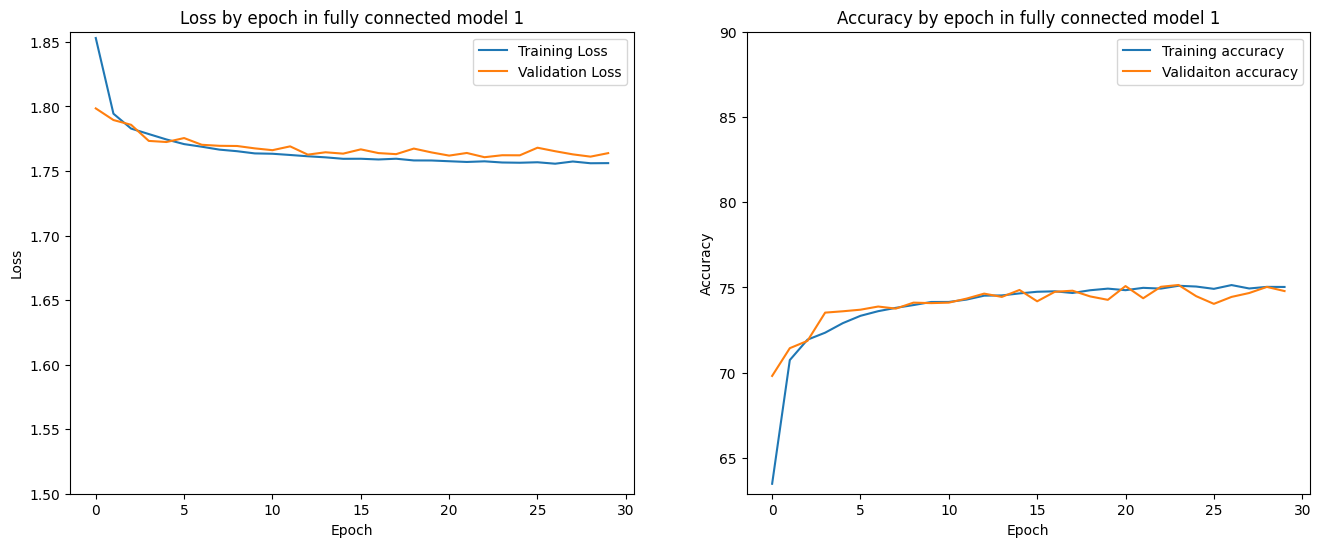

In [41]:
plot_model(df_1.index, df_1['Train loss'], df_1['valid loss'], df_1['train accuracy'], df_1['valid accuracy'], 'fully connected model 1')


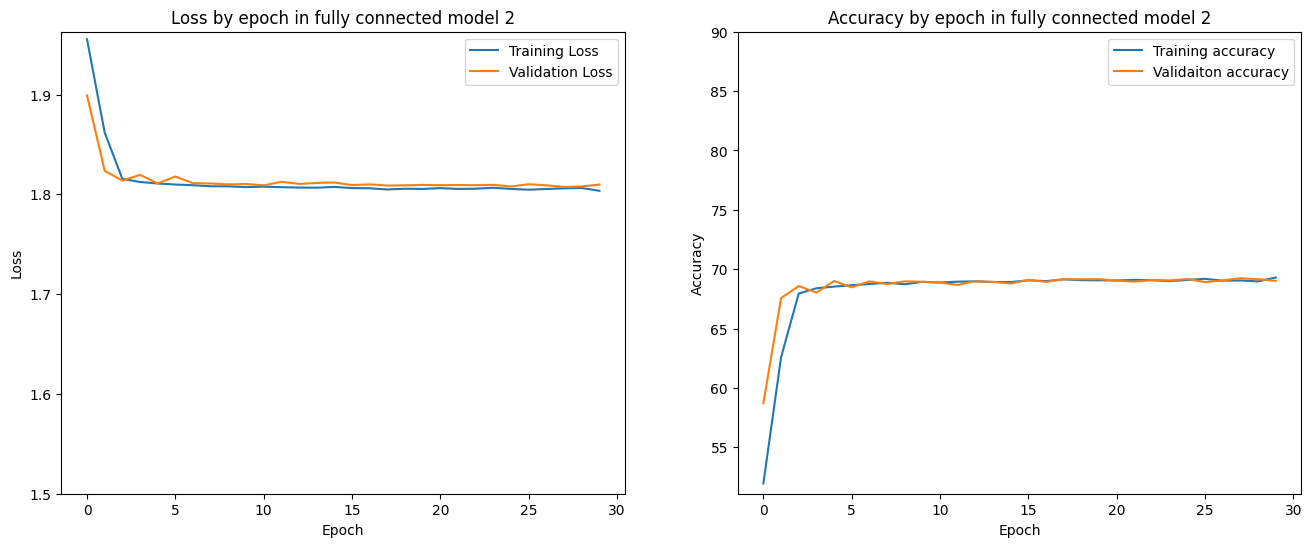

In [ ]:
plot_model(df_2.index, df_2['Train loss'], df_2['valid loss'], df_2['train accuracy'], df_2['valid accuracy'], 'fully connected model 2')


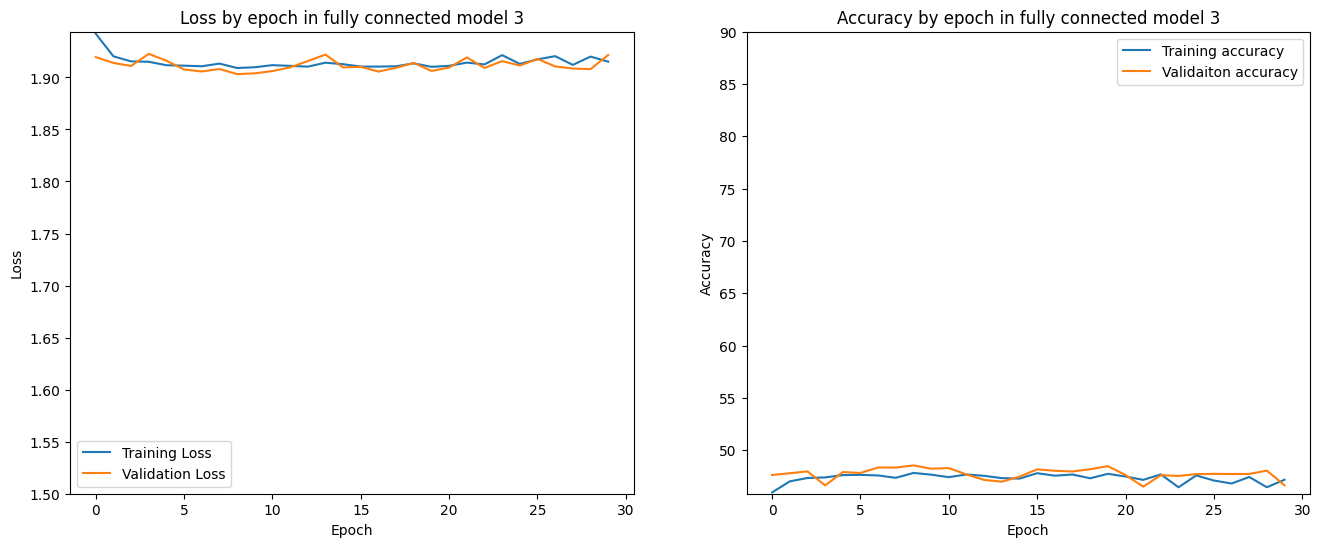

In [43]:
plot_model(df_3.index, df_3['Train loss'], df_3['valid loss'], df_3['train accuracy'], df_3['valid accuracy'], 'fully connected model 3')


As we can see model 1, the network with 2 fully connected hidden layers with 14 nodes each performed the best, with a validation accuracy of approximately 75%. 